<a href="https://colab.research.google.com/github/mmarynama/AI_Project/blob/main/MASTER_Group_project_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLARIFICATION QUESTIONS

- For the max speed we have found on the NYC website the types of vehilcles they use and checked max speed. where do we cite? in the code or
- Where to mention things liek to clean the dataset we kept trip amput 0 becUASE WE ARENT SURE WHGAT THE TRIPS WHERE someone doesnt pay at all count as 0 or a negativa value etc
- For the fare amout we think it cant be zero but, the way we removed iot is b exluding negarives and the Q1 lowest extreem quartile? surely thats optimal

# **Data Preprocessing**


In [1]:
#import the datatset
import pandas as pd
import numpy as np

# Load raw monthly TLC Yellow Taxi dataset
df = pd.read_parquet("yellow_tripdata_2025-09.parquet")

# Visualise the dataset
print(df.shape)
df.head()


(4251015, 20)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,2,2025-09-01 00:19:20,2025-09-01 00:45:17,1.0,9.92,1.0,N,138,114,1,42.9,6.0,0.5,10.73,0.0,1.0,66.13,2.5,1.75,0.75
1,2,2025-09-01 00:15:20,2025-09-01 00:26:08,2.0,6.82,1.0,N,93,157,1,26.8,1.0,0.5,5.86,0.0,1.0,35.16,0.0,0.00,0.00
2,2,2025-09-01 00:06:07,2025-09-01 00:22:23,1.0,3.95,1.0,N,68,13,1,19.8,1.0,0.5,5.11,0.0,1.0,30.66,2.5,0.00,0.75
3,2,2025-09-01 00:49:47,2025-09-01 01:04:49,1.0,3.14,1.0,N,234,87,1,17.7,1.0,0.5,3.52,0.0,1.0,26.97,2.5,0.00,0.75
4,2,2025-09-01 00:05:00,2025-09-01 00:15:32,6.0,2.81,1.0,N,230,151,1,14.9,1.0,0.5,4.13,0.0,1.0,24.78,2.5,0.00,0.75


In [2]:
print(df['VendorID'].value_counts(dropna=False))

VendorID
2    3374033
1     817547
7      56583
6       2852
Name: count, dtype: int64


In [3]:
unexpected = df[~df['VendorID'].isin([1,2,6,7])]
print("Number of unexpected VendorIDs:")
print(unexpected['VendorID'].value_counts())

Number of unexpected VendorIDs:
Series([], Name: count, dtype: int64)


In [4]:
missing_pct_per_vendor = (
    df.groupby('VendorID')
      .apply(lambda x: x.isna().mean() * 100)
)

print("\nPercentage of missing values per VendorID:")
print(missing_pct_per_vendor)


Percentage of missing values per VendorID:
          VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  \
VendorID                                                          
1              0.0                   0.0                    0.0   
2              0.0                   0.0                    0.0   
6              0.0                   0.0                    0.0   
7              0.0                   0.0                    0.0   

          passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
VendorID                                                                   
1               16.668644            0.0   16.668644           16.668644   
2               27.506222            0.0   27.506222           27.506222   
6              100.000000            0.0  100.000000          100.000000   
7                0.000000            0.0    0.000000            0.000000   

          PULocationID  DOLocationID  payment_type  fare_amount  extra  \
VendorID              

/tmp/ipython-input-3156252074.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isna().mean() * 100)


In [5]:
# Load taxi zone lookup
zones = pd.read_csv("taxi_zone_lookup.csv")

# Merge pickup spatial context
zones_PU = zones.rename(columns={
    'LocationID': 'PULocationID',
    'Borough': 'PU_Borough',
    'Zone': 'PU_Zone',
    'service_zone': 'PU_service_zone'
})[['PULocationID', 'PU_Borough', 'PU_Zone', 'PU_service_zone']]

# Merge dropoff spatial context
zones_DO = zones.rename(columns={
    'LocationID': 'DOLocationID',
    'Borough': 'DO_Borough',
    'Zone': 'DO_Zone',
    'service_zone': 'DO_service_zone'
})[['DOLocationID', 'DO_Borough', 'DO_Zone', 'DO_service_zone']]

# add to the main datframe
df = df.merge(zones_PU, on='PULocationID', how='left')
df = df.merge(zones_DO, on='DOLocationID', how='left')


# Visualise the dataset
print(df.shape)
df.head()


(4251015, 26)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone
0,2,2025-09-01 00:19:20,2025-09-01 00:45:17,1.0,9.92,1.0,N,138,114,1,...,66.13,2.5,1.75,0.75,Queens,LaGuardia Airport,Airports,Manhattan,Greenwich Village South,Yellow Zone
1,2,2025-09-01 00:15:20,2025-09-01 00:26:08,2.0,6.82,1.0,N,93,157,1,...,35.16,0.0,0.00,0.00,Queens,Flushing Meadows-Corona Park,Boro Zone,Queens,Maspeth,Boro Zone
2,2,2025-09-01 00:06:07,2025-09-01 00:22:23,1.0,3.95,1.0,N,68,13,1,...,30.66,2.5,0.00,0.75,Manhattan,East Chelsea,Yellow Zone,Manhattan,Battery Park City,Yellow Zone
3,2,2025-09-01 00:49:47,2025-09-01 01:04:49,1.0,3.14,1.0,N,234,87,1,...,26.97,2.5,0.00,0.75,Manhattan,Union Sq,Yellow Zone,Manhattan,Financial District North,Yellow Zone
4,2,2025-09-01 00:05:00,2025-09-01 00:15:32,6.0,2.81,1.0,N,230,151,1,...,24.78,2.5,0.00,0.75,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Manhattan Valley,Yellow Zone


In [6]:
print(df.shape)

(4251015, 26)


# Checking spatial logic

In [7]:
# Count and drop trips in unknown zone (264) or outside of NYC (265)
unknown_ids = [264, 265]

# Count PU occurrences
pu_unknown_count = df[df['PULocationID'].isin(unknown_ids)].shape[0]

# Count DO occurrences
do_unknown_count = df[df['DOLocationID'].isin(unknown_ids)].shape[0]

# Count how many UNIQUE trips include either
either_unknown_count = df[
    df['PULocationID'].isin(unknown_ids) | df['DOLocationID'].isin(unknown_ids)
].shape[0]

print("Trips with PU in {264,265}:", pu_unknown_count)
print("Trips with DO in {264,265}:", do_unknown_count)
print("Trips touching zone 264 or 265:", either_unknown_count)

# Calculating the %
percent_unknown = (
    df[
        df['PULocationID'].isin(unknown_ids) |
        df['DOLocationID'].isin(unknown_ids)
    ].shape[0] / len(df)
) * 100

print("Percentage of trips touching zone 264 or 265:", percent_unknown)


Trips with PU in {264,265}: 8215
Trips with DO in {264,265}: 28247
Trips touching zone 264 or 265: 32074
Percentage of trips touching zone 264 or 265: 0.7545021600723593


In [8]:
# <1% therfore drop trips involving zone 264 or 265
df = df[~df['PULocationID'].isin(unknown_ids)]
df = df[~df['DOLocationID'].isin(unknown_ids)]


In [9]:
# Summary of missing values per column
missing_summary = df.isnull().sum().sort_values(ascending=False)

# Convert to percentages as well
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

# Combine into one table
missing_table = pd.DataFrame({
    'missing_count': missing_summary,
    'missing_percent': missing_percent})

missing_table


,missing_count,missing_percent
RatecodeID,1063667,25.211706
passenger_count,1063667,25.211706
store_and_fwd_flag,1063667,25.211706
congestion_surcharge,1063667,25.211706
Airport_fee,1063667,25.211706
VendorID,0,0.000000
trip_distance,0,0.000000
PULocationID,0,0.000000
tpep_pickup_datetime,0,0.000000
tpep_dropoff_datetime,0,0.000000


In [ ]:
# Handling Missing Values
# RatecodeID (categorical)
# Replace missing RatecodeID with the modal (most common) value
ratecode_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(ratecode_mode)

# Passenger Count (numeric)
# Replace missing passenger counts with median
passenger_median = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(passenger_median)

# ----- 3. store_and_fwd_flag (categorical)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')

# ----- 4. congestion_surcharge (numeric)
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

# ----- 5. Airport_fee (numeric)
df['Airport_fee'] = df['Airport_fee'].fillna(0)

# Optional: print remaining missing values summary
print("Remaining missing values:")
print(df.isna().sum()[df.isna().sum() > 0])


In [10]:
# Check borough validity
pd.DataFrame({
    "Pickup": df["PU_Borough"].value_counts(),
    "Dropoff": df["DO_Borough"].value_counts()})

,Pickup,Dropoff
Bronx,30131,52736
Brooklyn,163140,259763
EWR,530,7892
Manhattan,3622170,3642988
Queens,402540,254254
Staten Island,430,1308


In [11]:
print(df.shape)

(4218941, 26)


# Checking temporal logic

In [12]:
# Convert timestamps
df['tpep_pickup_datetime']  = pd.to_datetime(df['tpep_pickup_datetime'], errors= 'coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors= 'coerce')

# Remove rows where parsing failed
df = df.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

In [13]:
# Check if there are any rows that contain data from other months other than September
df['tpep_pickup_datetime'].dt.month.value_counts()

,count
tpep_pickup_datetime,
9,4218934
8,6
10,1


In [14]:
# Check if there are any rows that contain data from other yeears other than 2025
df['tpep_pickup_datetime'].dt.year.value_counts()

,count
tpep_pickup_datetime,
2025,4218941


In [15]:
min_ts_raw = df['tpep_pickup_datetime'].min()
max_ts_raw = df['tpep_pickup_datetime'].max()

span_days_raw = (max_ts_raw - min_ts_raw).days + 1

print("RAW DATA TIME RANGE")
print(f"Earliest pickup: {min_ts_raw}")
print(f"Latest pickup:   {max_ts_raw}")
print(f"Span:            {span_days_raw} days ({span_days_raw/365.25:.2f} years)")

# Check number of distinct days
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
print("\nDistinct days in raw data:", df['pickup_date'].nunique())


RAW DATA TIME RANGE
Earliest pickup: 2025-08-31 23:45:38
Latest pickup:   2025-10-01 00:00:11
Span:            31 days (0.08 years)

Distinct days in raw data: 32


In [16]:
# Drop rows containing data from anytime other than September and other than data from 2025
df = df[
    (df['tpep_pickup_datetime'].dt.year == 2025) &
    (df['tpep_pickup_datetime'].dt.month == 9)]

In [17]:
min_ts_raw = df['tpep_pickup_datetime'].min()
max_ts_raw = df['tpep_pickup_datetime'].max()

span_days_raw = (max_ts_raw - min_ts_raw).days + 1

print("RAW DATA TIME RANGE")
print(f"Earliest pickup: {min_ts_raw}")
print(f"Latest pickup:   {max_ts_raw}")
print(f"Span:            {span_days_raw} days ({span_days_raw/365.25:.2f} years)")

# Check number of distinct days
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
print("\nDistinct days in raw data:", df['pickup_date'].nunique())

RAW DATA TIME RANGE
Earliest pickup: 2025-09-01 00:00:00
Latest pickup:   2025-09-30 23:59:59
Span:            30 days (0.08 years)

Distinct days in raw data: 30


In [18]:
# Remove rows where timestamp columns are empty / invalid
df = df[
    df['tpep_pickup_datetime'].notna() &
    df['tpep_dropoff_datetime'].notna()]

In [ ]:
# Check whether there are any where pick up is after drop off
invalid_timestamps = df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]
invalid_count = invalid_timestamps.shape[0]

print("Number of rows with dropoff BEFORE pickup:", invalid_count)


Number of rows with dropoff BEFORE pickup: 0


In [ ]:
# Remove impossible timestamps (pickup after dropoff)
df = df[df['tpep_dropoff_datetime'] >= df['tpep_pickup_datetime']]

In [ ]:
# Compute trip duration
df['duration_min'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60

df = df[df['duration_min'] > 0]  # drop impossible trips

df.head(5).round({'duration_min': 2})

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,Airport_fee,cbd_congestion_fee,PU_Borough,PU_Zone,PU_service_zone,DO_Borough,DO_Zone,DO_service_zone,duration_min
0,2,2025-09-01 00:19:20,2025-09-01 00:45:17,1.0,9.92,1.0,N,138,114,1,...,2.5,1.75,0.75,Queens,LaGuardia Airport,Airports,Manhattan,Greenwich Village South,Yellow Zone,25.95
1,2,2025-09-01 00:15:20,2025-09-01 00:26:08,2.0,6.82,1.0,N,93,157,1,...,0.0,0.00,0.00,Queens,Flushing Meadows-Corona Park,Boro Zone,Queens,Maspeth,Boro Zone,10.80
2,2,2025-09-01 00:06:07,2025-09-01 00:22:23,1.0,3.95,1.0,N,68,13,1,...,2.5,0.00,0.75,Manhattan,East Chelsea,Yellow Zone,Manhattan,Battery Park City,Yellow Zone,16.27
3,2,2025-09-01 00:49:47,2025-09-01 01:04:49,1.0,3.14,1.0,N,234,87,1,...,2.5,0.00,0.75,Manhattan,Union Sq,Yellow Zone,Manhattan,Financial District North,Yellow Zone,15.03
4,2,2025-09-01 00:05:00,2025-09-01 00:15:32,6.0,2.81,1.0,N,230,151,1,...,2.5,0.00,0.75,Manhattan,Times Sq/Theatre District,Yellow Zone,Manhattan,Manhattan Valley,Yellow Zone,10.53


In [ ]:
df['duration_min'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2)

,duration_min
count,4162449.00
mean,18.74
std,28.01
min,0.02
1%,0.57
5%,3.83
50%,14.68
95%,46.60
99%,73.83
max,9907.05


In [ ]:
#Duration
print("Trip Duration (minutes) Summary by VendorID")
print(df.groupby("VendorID")['duration_min'].describe())



=== Trip Duration (minutes) Summary by VendorID ===
              count       mean        std       min        25%        50%  \
VendorID                                                                    
1          807827.0  20.530889  29.541034  0.016667   8.733333  14.850000   
2         3351771.0  18.284726  27.595561  0.016667   8.900000  14.633333   
6            2851.0  39.520414  38.784433  0.016667  22.141667  35.316667   

                75%      max  
VendorID                      
1         24.933333  9907.05  
2         22.983333  8799.20  
6         51.233333  1708.80  


In [ ]:
# Identify trips loger than 4 hours long
invalid_long = df[df['duration_min'] > 240]
print("Trips with duration > 240 min:", invalid_long.shape[0])
print("Percentage:", invalid_long.shape[0] / len(df) * 100)

Trips with duration > 240 min: 1377
Percentage: 0.03308148640379738


In [ ]:
# Drop trips loger than 4 hours long
df = df[(df['duration_min'] > 0) & (df['duration_min'] <= 240)]

In [ ]:
print(df.shape)

(4161072, 27)


# Numeric Integrity Checks & Outlier Removal

In [ ]:
# Ensure numeric columns contain only numeric values
temp = df.copy()
numeric_cols = [
    'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
    'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'Airport_fee', 'cbd_congestion_fee',
    'RatecodeID', 'payment_type', 'PULocationID', 'DOLocationID']

for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# Compute speed
df['speed_mph'] = df['trip_distance'] / (df['duration_min'] / 60)

In [ ]:
# Count invalid rows where the speed is less than 0 and greater than 120
invalid_speed = df[(df['speed_mph'] <= 0) | (df['speed_mph'] > 120)]
print("Invalid speed rows:", invalid_speed.shape[0])
print("Percentage:", invalid_speed.shape[0] / len(df) * 100)

Invalid speed rows: 122152
Percentage: 2.9355896749683734


In [ ]:
 # Drop invalid speed
df = df[(df['speed_mph'] > 0) & (df['speed_mph'] <= 120)]

In [ ]:
df['speed_mph'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2)

,speed_mph
count,4038920.00
mean,10.71
std,6.31
min,0.01
1%,1.76
5%,3.81
50%,9.19
95%,23.49
99%,33.36
max,120.00


In [ ]:
Q1 = df['speed_mph'].quantile(0.01)
Q99 = df['speed_mph'].quantile(0.99)
df = df[(df['speed_mph'] >= Q1) & (df['speed_mph'] <= Q99)]

In [ ]:
# Count invalid rows where the distance is less than 0 and greater than 120
invalid_distance = df[(df['trip_distance'] <= 0) | (df['trip_distance'] > 120)]
print("Invalid distance rows:", invalid_distance.shape[0])
print("Percentage:", invalid_distance.shape[0] / len(df) * 100)

Invalid distance rows: 0
Percentage: 0.0


In [ ]:
 # Drop invalid distance
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 120)]


In [ ]:
df['trip_distance'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2)

,trip_distance
count,3958140.00
mean,3.50
std,4.01
min,0.01
1%,0.30
5%,0.55
50%,2.00
95%,12.31
99%,18.90
max,72.99


In [ ]:
# Drop extremes
Q1 = df['trip_distance'].quantile(0.01)
Q99 = df['trip_distance'].quantile(0.99)
df = df[(df['trip_distance'] >= Q1) & (df['trip_distance'] <= Q99)]

In [ ]:
# Fare logic test
# Check how many negative values are present in the fare_amount column and total_amount column
negative_fare_count = (df['fare_amount'] < 0).sum()
print ("Number of negative fare amounts:", negative_fare_count)
negative_total_fare_count = (df['total_amount'] < 0).sum()
print ("Number of negative total fare amounts:", negative_total_fare_count)

Number of negative fare amounts: 212951
Number of negative total fare amounts: 61378


In [ ]:
#Check if All negative total fare values occur when base fare amount is negative
# Condition: For all rows where base fare < 0, total fare must also be < 0
condition = (df.loc[df['total_amount'] < 0, 'fare_amount'] < 0).all()

if condition:
    print("Yes: Every negative total fare has a negative base fare.")
else:
    print("No: There are cases where total fare is negative but base fare is not.")

No: There are cases where total fare is negative but base fare is not.


In [ ]:
#Check if All negative base fare values occur when total fare amount is negative
# Condition: For all rows where total fare < 0, base fare must also be < 0
condition = (df.loc[df['fare_amount'] < 0, 'total_amount'] < 0).all()

if condition:
    print("Yes: Every negative base fare has a negative total fare.")
else:
    print("No: There are cases where base fare is negative but total fare is not.")

No: There are cases where base fare is negative but total fare is not.


In [ ]:
# Drop invalid fares
df = df[(df['total_amount'] > 0) & (df['fare_amount'] >= 0)]

In [ ]:
# Visualise the dataset
print(df.shape)

#Check the distribution of fare amount and total amount
pd.DataFrame({
    "fare_amount": df['fare_amount'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2),
    "total_amount": df['total_amount'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2)})

(3668530, 28)


,fare_amount,total_amount
count,3668530.00,3668530.00
mean,19.76,28.35
std,169.66,170.03
min,0.00,0.50
1%,5.10,10.07
5%,6.50,12.60
50%,15.06,22.74
95%,50.40,70.90
99%,70.00,99.78
max,323800.27,323820.17


In [ ]:
# Drop extremes in fare_amount
Q1 = df['fare_amount'].quantile(0.01)
Q99 = df['fare_amount'].quantile(0.99)
df = df[(df['fare_amount'] >= Q1) & (df['fare_amount'] <= Q99)]

In [ ]:
# # Drop extremes in total_amount
Q1 = df['total_amount'].quantile(0.01)
Q99 = df['total_amount'].quantile(0.99)
df = df[(df['total_amount'] >= Q1) & (df['total_amount'] <= Q99)]

In [ ]:
# Visualise the dataset
print(df.shape)

(3547672, 28)


In [ ]:
pd.DataFrame({
    "fare_amount": df['fare_amount'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2),
    "total_amount": df['total_amount'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2)})

,fare_amount,total_amount
count,3547672.00,3547672.00
mean,19.02,27.34
std,12.61,15.49
min,5.10,10.50
1%,5.10,11.25
5%,6.50,12.95
50%,15.12,22.74
95%,45.00,62.71
99%,70.00,88.44
max,70.00,98.03


In [ ]:
# Remove all rows with either negative extra or cbd_congestion_fee
df = df[(df['extra'] >= 0) & (df['cbd_congestion_fee'] >= 0)]

# Visualise the dataset
print(df.shape)

(3547653, 28)


In [ ]:
df['cbd_congestion_fee'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2)

,cbd_congestion_fee
count,3547653.00
mean,0.57
std,0.32
min,0.00
1%,0.00
5%,0.00
50%,0.75
95%,0.75
99%,0.75
max,1.50


In [ ]:
df['extra'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2)

,extra
count,3547653.00
mean,1.26
std,1.80
min,0.00
1%,0.00
5%,0.00
50%,0.00
95%,5.00
99%,7.50
max,15.00


In [ ]:
# Address  extreme values in extra and cbd_congestion_fee
# In extra
Q99 = df['extra'].quantile(0.99)
df = df[(df['extra'] <= Q99)]

# In cbd_congestion_fee
Q99 = df['cbd_congestion_fee'].quantile(0.99)
df = df[(df['cbd_congestion_fee'] <= Q99)]

In [ ]:
pd.DataFrame({
    "extra": df['extra'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2),
    "cbd_congestion_fee": df['cbd_congestion_fee'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2)})

,extra,cbd_congestion_fee
count,3526942.00,3526942.00
mean,1.21,0.57
std,1.68,0.32
min,0.00,0.00
1%,0.00,0.00
5%,0.00,0.00
50%,0.00,0.75
95%,5.00,0.75
99%,6.00,0.75
max,7.50,0.75


In [ ]:
# Count invalid rows where the number of passangers is 0 and greater than 9, considering 5 adults and 4 children under 7 on laps of the adults (New York City Taxi and Limousine Commission 2025)
invalid_speed = df[(df['speed_mph'] <= 0) | (df['speed_mph'] > 120)]
print("Invalid speed rows:", invalid_speed.shape[0])
print("Percentage:", invalid_speed.shape[0] / len(df) * 100)

Invalid speed rows: 0
Percentage: 0.0


In [ ]:
#check if any row with numerical value has a zero value
zero_values = df.select_dtypes(include=['number']).eq(0).any()
print(zero_values)

VendorID                 False
passenger_count           True
trip_distance            False
RatecodeID               False
PULocationID             False
DOLocationID             False
payment_type              True
fare_amount              False
extra                     True
mta_tax                   True
tip_amount                True
tolls_amount              True
improvement_surcharge     True
total_amount             False
congestion_surcharge      True
Airport_fee               True
cbd_congestion_fee        True
duration_min             False
speed_mph                False
dtype: bool


In [ ]:
df['passenger_count'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2)


,passenger_count
count,2753064.00
mean,1.26
std,0.67
min,0.00
1%,1.00
5%,1.00
50%,1.00
95%,2.00
99%,4.00
max,6.00


In [ ]:
#remove all rows with zero passenger count
df = df[df['passenger_count'] > 0]

#address abnormal extreme values in passenger count; keep max passenger count at 5 as describe in The Official Website of the City of New York
upper_limit = 9
df = df[df['passenger_count'] <= upper_limit]

df['passenger_count'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).round(2)

,passenger_count
count,2733546.00
mean,1.27
std,0.66
min,1.00
1%,1.00
5%,1.00
50%,1.00
95%,3.00
99%,4.00
max,6.00


In [ ]:
print(df.shape)

(2733546, 28)


# Buliding Comparison graphs

In [ ]:
# Creating the 'before' dataframe with minimal data preprocessing
import pandas as pd

# BEFORE PREPROCESSING DATA
# Load raw data
df_before = pd.read_parquet("yellow_tripdata_2025-09.parquet")

# Parse timestamps
df_before['tpep_pickup_datetime']  = pd.to_datetime(
    df_before['tpep_pickup_datetime'], errors='coerce')
df_before['tpep_dropoff_datetime'] = pd.to_datetime(
    df_before['tpep_dropoff_datetime'], errors='coerce')

# Drop rows where timestamps are invalid
df_before = df_before.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])

# Coerce key numeric columns
numeric_cols = ['trip_distance', 'fare_amount', 'total_amount',
    'PULocationID', 'DOLocationID']

for col in numeric_cols:
    if col in df_before.columns:
        df_before[col] = pd.to_numeric(df_before[col], errors='coerce')

# Drop rows with missing critical numeric values
df_before = df_before.dropna(subset=['trip_distance', 'PULocationID', 'DOLocationID'])

# Compute duration
df_before['duration_min'] = (
    df_before['tpep_dropoff_datetime'] - df_before['tpep_pickup_datetime']).dt.total_seconds() / 60

# Compute speed (only where duration_min > 0 to avoid division by zero)
df_before = df_before[df_before['duration_min'] > 0].copy()
df_before['speed_mph'] = df_before['trip_distance'] / (df_before['duration_min'] / 60)

# Merge spatial info (zones, boroughs, service_zone)
zones = pd.read_csv("taxi_zone_lookup.csv")

zones_PU = zones.rename(columns={
    'LocationID': 'PULocationID',
    'Borough': 'PU_Borough',
    'Zone': 'PU_Zone',
    'service_zone': 'PU_service_zone'
})[['PULocationID', 'PU_Borough', 'PU_Zone', 'PU_service_zone']]

zones_DO = zones.rename(columns={
    'LocationID': 'DOLocationID',
    'Borough': 'DO_Borough',
    'Zone': 'DO_Zone',
    'service_zone': 'DO_service_zone'
})[['DOLocationID', 'DO_Borough', 'DO_Zone', 'DO_service_zone']]

df_before = df_before.merge(zones_PU, on='PULocationID', how='left')
df_before = df_before.merge(zones_DO, on='DOLocationID', how='left')

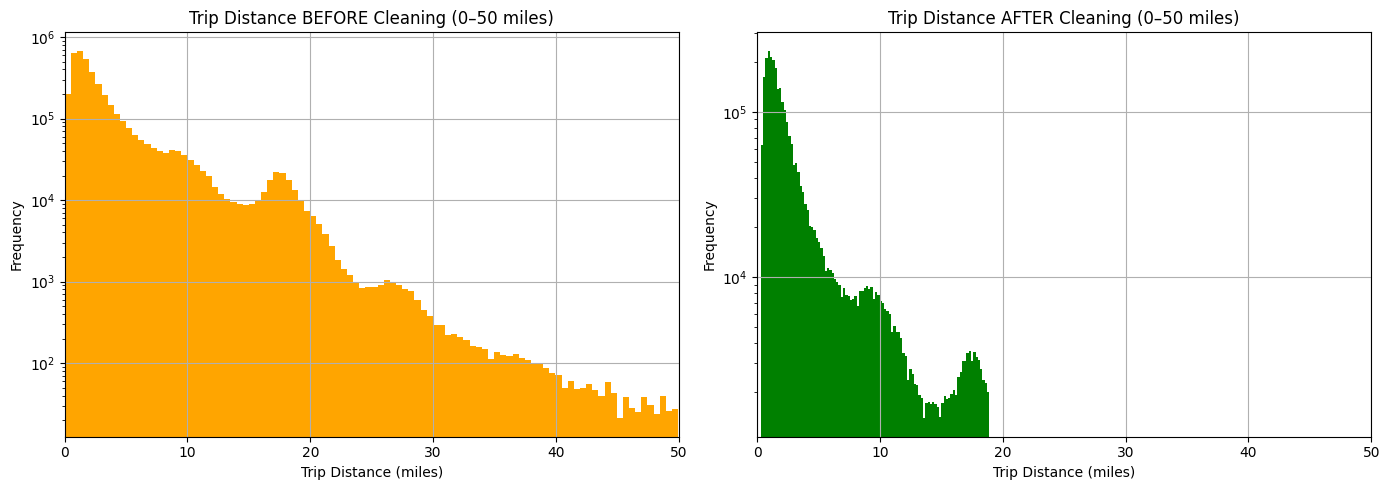

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# sensible range for plotting
max_dist = 50  # or e.g. df_before['trip_distance'].quantile(0.99)

before_mask = (df_before['trip_distance'] > 0) & (df_before['trip_distance'] <= max_dist)
after_mask  = (df['trip_distance'] > 0) & (df['trip_distance'] <= max_dist)

# BEFORE CLEANING (visual only – still using raw df_before, just clipped)
df_before.loc[before_mask, 'trip_distance'].hist(
    bins=100,
    ax=ax[0],
    color='orange'
)
ax[0].set_title("Trip Distance BEFORE Cleaning (0–50 miles)")
ax[0].set_xlabel("Trip Distance (miles)")
ax[0].set_ylabel("Frequency")
ax[0].set_xlim(0, max_dist)

# AFTER CLEANING
df.loc[after_mask, 'trip_distance'].hist(
    bins=100,
    ax=ax[1],
    color='green'
)
ax[1].set_title("Trip Distance AFTER Cleaning (0–50 miles)")
ax[1].set_xlabel("Trip Distance (miles)")
ax[1].set_ylabel("Frequency")
ax[1].set_xlim(0, max_dist)
ax[0].set_yscale('log')
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()


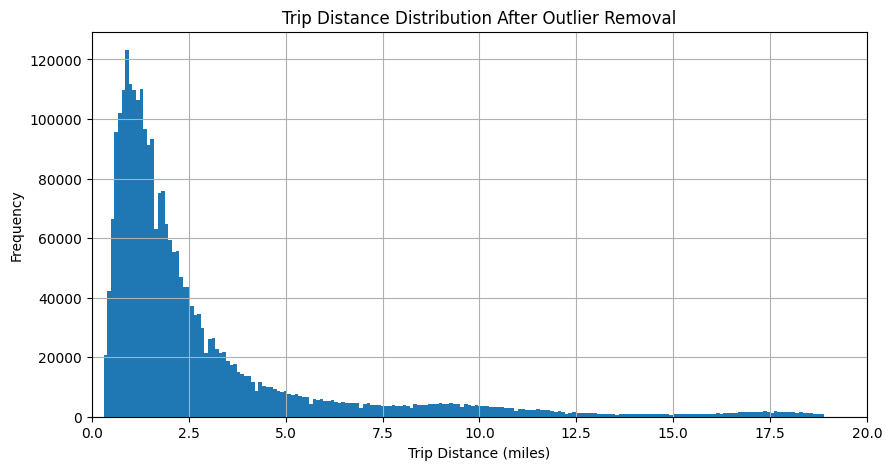

In [ ]:
import matplotlib.pyplot as plt

df['trip_distance'].hist(
    bins=200,
    figsize=(10,5))

plt.title("Trip Distance Distribution After Outlier Removal")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.xlim(0, 20)   # Zoomed-in view
plt.show()

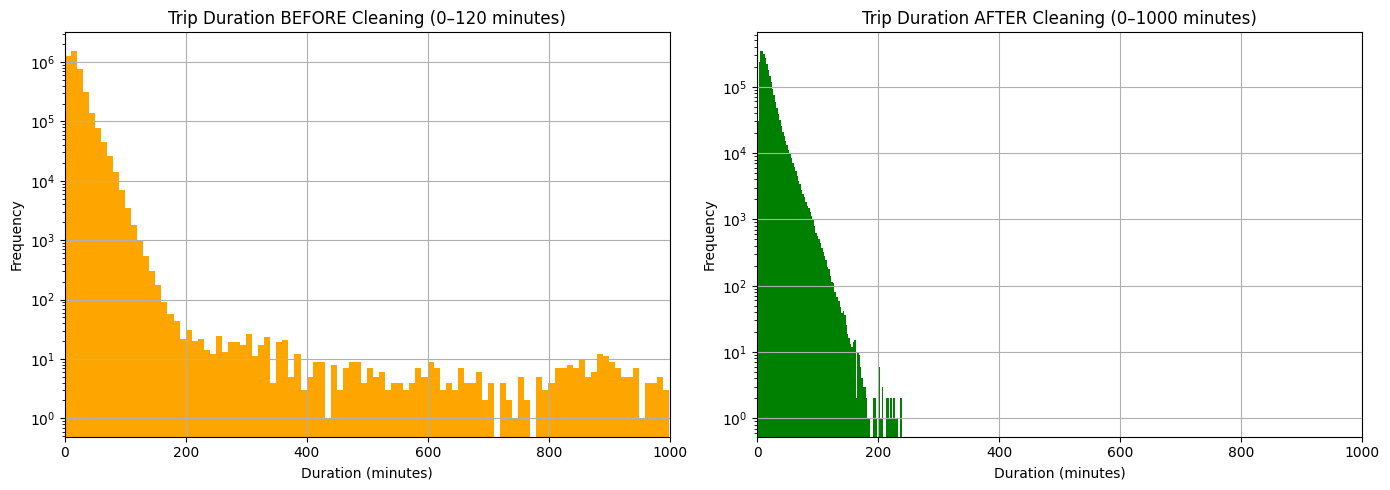

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Set a range
max_dur = 1000

before_mask = (df_before['duration_min'] > 0) & (df_before['duration_min'] <= max_dur)
after_mask  = (df['duration_min'] > 0) & (df['duration_min'] <= max_dur)

# BEFORE CLEANING
df_before.loc[before_mask, 'duration_min'].hist(
    bins=100,
    ax=ax[0],
    color='orange')
ax[0].set_title("Trip Duration BEFORE Cleaning (0–120 minutes)")
ax[0].set_xlabel("Duration (minutes)")
ax[0].set_ylabel("Frequency")
ax[0].set_xlim(0, max_dur)
ax[0].set_yscale('log')

# AFTER CLEANING
df.loc[after_mask, 'duration_min'].hist(
    bins=100,
    ax=ax[1],
    color='green')

ax[1].set_title("Trip Duration AFTER Cleaning (0–1000 minutes)")
ax[1].set_xlabel("Duration (minutes)")
ax[1].set_ylabel("Frequency")
ax[1].set_xlim(0, max_dur)
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()

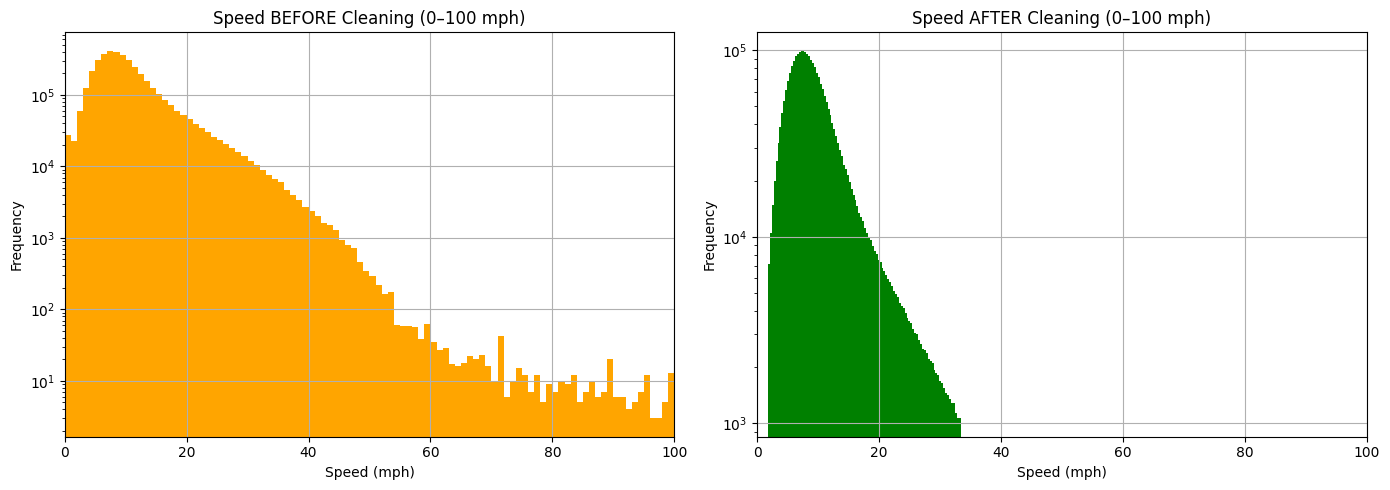

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# sensible range (visual only)
max_speed = 100  # almost no taxi exceeds this if data is clean

before_mask = (df_before['speed_mph'] > 0) & (df_before['speed_mph'] <= max_speed)
after_mask  = (df['speed_mph'] > 0) & (df['speed_mph'] <= max_speed)

# BEFORE CLEANING
df_before.loc[before_mask, 'speed_mph'].hist(
    bins=100,
    ax=ax[0],
    color='orange'
)
ax[0].set_title("Speed BEFORE Cleaning (0–100 mph)")
ax[0].set_xlabel("Speed (mph)")
ax[0].set_ylabel("Frequency")
ax[0].set_xlim(0, max_speed)
ax[0].set_yscale('log')

# AFTER CLEANING
df.loc[after_mask, 'speed_mph'].hist(
    bins=100,
    ax=ax[1],
    color='green'
)
ax[1].set_title("Speed AFTER Cleaning (0–100 mph)")
ax[1].set_xlabel("Speed (mph)")
ax[1].set_ylabel("Frequency")
ax[1].set_xlim(0, max_speed)
ax[1].set_yscale('log')

plt.tight_layout()
plt.show()

In [ ]:
# Summary of missing values per column
missing_summary = df.isnull().sum().sort_values(ascending=False)

# Convert to percentages as well
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)

# Combine into one table
missing_table = pd.DataFrame({
    'missing_count': missing_summary,
    'missing_percent': missing_percent})

missing_table

,missing_count,missing_percent
VendorID,0,0.0
tpep_pickup_datetime,0,0.0
tpep_dropoff_datetime,0,0.0
passenger_count,0,0.0
trip_distance,0,0.0
RatecodeID,0,0.0
store_and_fwd_flag,0,0.0
PULocationID,0,0.0
DOLocationID,0,0.0
payment_type,0,0.0


In [ ]:
print(df.shape)

(2733546, 28)


In [ ]:
print(df_before.shape)

(4193836, 28)


# Vendor Check

In [ ]:
vendor_6_df = df[df['VendorID'] == 6]
if not vendor_6_df.empty:
    print(vendor_6_df.sample(min(10, len(vendor_6_df)), random_state=42))
else:
    print("No rows found for VendorID == 6 after cleaning.")
    # As a fallback, also show the value counts of VendorID in the current DataFrame
    print("\nCurrent VendorID distribution:")
    print(df['VendorID'].value_counts())

No rows found for VendorID == 6 after cleaning.

Current VendorID distribution:
VendorID
2    2146051
1     587495
Name: count, dtype: int64


In [ ]:
df['VendorID'].value_counts()


,count
VendorID,
2,2146051
1,587495


1.1.2 Missing Values per Vendor

In [ ]:
missing_by_vendor = df.groupby("VendorID").apply(lambda x: x.isnull().mean())
print("\n=== Missingness per VendorID (proportion of nulls) ===")
print(missing_by_vendor)


=== Missingness per VendorID (proportion of nulls) ===
          VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  \
VendorID                                                          
1              0.0                   0.0                    0.0   
2              0.0                   0.0                    0.0   

          passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  \
VendorID                                                                   
1                     0.0            0.0         0.0                 0.0   
2                     0.0            0.0         0.0                 0.0   

          PULocationID  DOLocationID  payment_type  ...  Airport_fee  \
VendorID                                            ...                
1                  0.0           0.0           0.0  ...          0.0   
2                  0.0           0.0           0.0  ...          0.0   

          cbd_congestion_fee  PU_Borough  PU_Zone  PU_service_zone  \
VendorID   

/tmp/ipython-input-2740597173.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_vendor = df.groupby("VendorID").apply(lambda x: x.isnull().mean())


1.1.3. Distribution diagnostics per Vendor

In [ ]:
#Speed
print("\n=== Trip Speed (mph) Summary by VendorID ===")
print(df.groupby("VendorID")['speed_mph'].describe())



=== Trip Speed (mph) Summary by VendorID ===
              count      mean       std       min       25%       50%  \
VendorID                                                                
1          587495.0  9.243543  4.436737  1.761006  6.271777  8.360656   
2         2146051.0  9.848767  5.146945  1.760870  6.424242  8.684211   

                75%        max  
VendorID                        
1         11.114923  33.353474  
2         11.785166  33.356643  


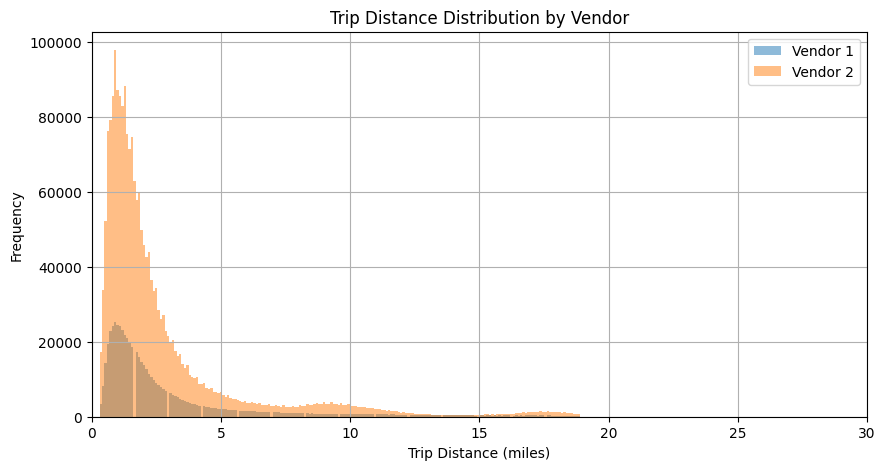

In [ ]:
import matplotlib.pyplot as plt

for v in [1, 2]:
    df[df['VendorID'] == v]['trip_distance'].hist(
        bins=200,
        alpha=0.5,
        label=f"Vendor {v}",
        figsize=(10,5)
    )

plt.legend()
plt.title("Trip Distance Distribution by Vendor")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.xlim(0, 30)   # focus on realistic range
plt.show()

# **30 min agregation**

In [ ]:
df['pickup_bin'] = df['tpep_pickup_datetime'].dt.floor('30min')

# Group by zone and time bin, count trips
trips_per_bin = (
    df.groupby(['PULocationID', 'pickup_bin'])
      .size()
      .reset_index(name='trips_count'))

# Show the first few rows of the result
print(trips_per_bin.head(10))

   PULocationID          pickup_bin  trips_count
0             1 2025-09-01 07:00:00            1
1             1 2025-09-27 14:30:00            1
2             1 2025-09-28 17:30:00            1
3             2 2025-09-19 20:30:00            1
4             2 2025-09-23 14:00:00            1
5             2 2025-09-28 18:30:00            1
6             3 2025-09-01 10:30:00            1
7             3 2025-09-01 13:00:00            1
8             3 2025-09-01 17:30:00            1
9             3 2025-09-02 05:30:00            2


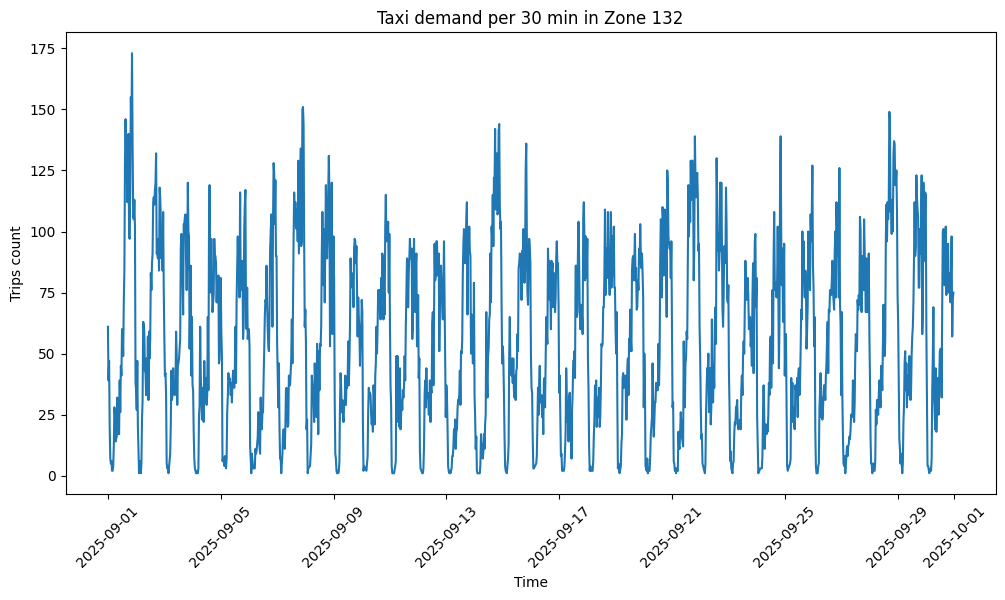

In [ ]:
import matplotlib.pyplot as plt

zone_id = 132  # example zone
zone_data = trips_per_bin[trips_per_bin['PULocationID'] == zone_id]

plt.figure(figsize=(12,6))
plt.plot(zone_data['pickup_bin'], zone_data['trips_count'])
plt.title(f"Taxi demand per 30 min in Zone {zone_id}")
plt.xlabel("Time")
plt.ylabel("Trips count")
plt.xticks(rotation=45)
plt.show()

### Aggregate Data by Half Hourly Intervals

In [ ]:
# Make sure pickup datetime is datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Half-hour bins
temp['pickup_bin'] = temp['tpep_pickup_datetime'].dt.floor('30min')

# Aggregate by pickup location and half-hour
trips_per_bin = (
    temp.groupby(['PULocationID', 'pickup_bin'])
      .agg(
          # volume
          trips_count=('VendorID', 'size'),

          # passengers
          avg_passenger_count=('passenger_count', 'mean'),
          total_passengers=('passenger_count', 'sum'),

          # distance
          avg_trip_distance=('trip_distance', 'mean'),
          total_trip_distance=('trip_distance', 'sum'),

          # time
          avg_duration_min=('duration_min', 'mean'),
          total_duration_min=('duration_min', 'sum'),

          # fares & money columns
          avg_fare_amount=('fare_amount', 'mean'),
          total_fare_amount=('fare_amount', 'sum'),
          total_extra=('extra', 'sum'),
          total_mta_tax=('mta_tax', 'sum'),
          avg_tip_amount=('tip_amount', 'mean'),
          total_tip_amount=('tip_amount', 'sum'),
          total_tolls_amount=('tolls_amount', 'sum'),
          total_improvement_surcharge=('improvement_surcharge', 'sum'),
          total_total_amount=('total_amount', 'sum'),
          total_congestion_surcharge=('congestion_surcharge', 'sum'),
          total_airport_fee=('Airport_fee', 'sum'),
          total_cbd_congestion_fee=('cbd_congestion_fee', 'sum'),
      )
      .reset_index())

# assume temp is already filtered to a single month
month_start = temp['tpep_pickup_datetime'].min().to_period('M').to_timestamp()       # first day, 00:00
month_end   = (month_start + pd.offsets.MonthEnd(0)) + pd.Timedelta(hours=23, minutes=30)

# all half-hour bins for that month
all_bins = pd.date_range(start=month_start,
                         end=month_end,
                         freq='30min')

# all pickup locations present in this month
all_pu = temp['PULocationID'].unique()

# full grid: every PU × every half-hour in the month
full_index = pd.MultiIndex.from_product(
    [all_pu, all_bins],
    names=['PULocationID', 'pickup_bin'])

# reindex aggregated data onto full grid
trips_per_bin_full = (
    trips_per_bin
    .set_index(['PULocationID', 'pickup_bin'])
    .reindex(full_index)
    .reset_index())

# fill numeric NaNs with 0 (no rides in that interval)
numeric_cols = [
    'trips_count',
    'avg_passenger_count',
    'total_passengers',
    'avg_trip_distance',
    'total_trip_distance',
    'avg_duration_min',
    'total_duration_min',
    'avg_fare_amount',
    'total_fare_amount',
    'total_extra',
    'total_mta_tax',
    'avg_tip_amount',
    'total_tip_amount',
    'total_tolls_amount',
    'total_improvement_surcharge',
    'total_total_amount',
    'total_congestion_surcharge',
    'total_airport_fee',
    'total_cbd_congestion_fee',]

trips_per_bin_full[numeric_cols] = trips_per_bin_full[numeric_cols].fillna(0)

# Add the zones back
zones_PU = zones.rename(columns={
    'LocationID': 'PULocationID',
    'Borough': 'PU_Borough',
    'Zone': 'PU_Zone',
    'service_zone': 'PU_service_zone'
})[['PULocationID', 'PU_Borough', 'PU_Zone', 'PU_service_zone']]

trips_per_bin_full = trips_per_bin_full.merge(
    zones_PU,
    on='PULocationID',
    how='left')

display(trips_per_bin.head(10))


,PULocationID,pickup_bin,trips_count,avg_passenger_count,total_passengers,avg_trip_distance,total_trip_distance,avg_duration_min,total_duration_min,avg_fare_amount,...,total_extra,total_mta_tax,avg_tip_amount,total_tip_amount,total_tolls_amount,total_improvement_surcharge,total_total_amount,total_congestion_surcharge,total_airport_fee,total_cbd_congestion_fee
0,1,2025-09-01 04:30:00,2,2.5,5.0,0.000,0.00,0.091667,0.183333,99.50,...,0.0,0.0,12.10,24.20,0.00,2.0,225.20,0.0,0.0,0.0
1,1,2025-09-01 06:00:00,2,1.0,2.0,0.000,0.00,0.100000,0.200000,38.00,...,0.0,0.0,0.00,0.00,0.00,2.0,78.00,0.0,0.0,0.0
2,1,2025-09-01 07:00:00,2,1.0,2.0,0.300,0.60,0.766667,1.533333,72.00,...,0.0,0.0,5.00,10.00,0.00,2.0,156.00,0.0,0.0,0.0
3,1,2025-09-01 07:30:00,1,1.0,1.0,0.000,0.00,0.216667,0.216667,122.00,...,0.0,0.0,28.60,28.60,20.00,1.0,171.60,0.0,0.0,0.0
4,1,2025-09-01 08:30:00,1,1.0,1.0,0.000,0.00,0.100000,0.100000,90.00,...,0.0,0.0,5.00,5.00,0.00,1.0,96.00,0.0,0.0,0.0
5,1,2025-09-01 09:00:00,2,1.0,2.0,0.015,0.03,0.208333,0.416667,112.00,...,0.0,0.0,16.10,32.20,0.00,2.0,258.20,0.0,0.0,0.0
6,1,2025-09-01 09:30:00,1,4.0,4.0,0.000,0.00,0.083333,0.083333,120.00,...,0.0,0.0,24.20,24.20,0.00,1.0,145.20,0.0,0.0,0.0
7,1,2025-09-01 10:00:00,1,1.0,1.0,0.000,0.00,0.283333,0.283333,30.00,...,0.0,0.0,0.00,0.00,0.00,1.0,31.00,0.0,0.0,0.0
8,1,2025-09-01 10:30:00,2,1.0,2.0,6.220,12.44,10.325000,20.650000,48.55,...,0.0,0.5,3.58,7.16,21.06,2.0,129.77,0.0,0.0,0.0
9,1,2025-09-01 11:30:00,1,1.0,1.0,0.000,0.00,2.100000,2.100000,112.00,...,0.0,0.0,22.60,22.60,0.00,1.0,135.60,0.0,0.0,0.0


In [ ]:
# --- AFTER AGGREGATION: zone × 30-min grid ---
trips_per_bin_full['pickup_bin'] = pd.to_datetime(trips_per_bin_full['pickup_bin'], errors='coerce')

min_ts_agg = trips_per_bin_full['pickup_bin'].min()
max_ts_agg = trips_per_bin_full['pickup_bin'].max()

span_days_agg = (max_ts_agg - min_ts_agg).days + 1

print("\n=== AGGREGATED DATA TIME RANGE ===")
print(f"Earliest pickup_bin: {min_ts_agg}")
print(f"Latest pickup_bin:   {max_ts_agg}")
print(f"Span:                {span_days_agg} days ({span_days_agg/365.25:.2f} years)")

# Check expected number of 30-min bins in this span
expected_bins = pd.date_range(start=min_ts_agg, end=max_ts_agg, freq='30min')
print("\nExpected number of 30-min bins:", len(expected_bins))
print("Actual unique pickup_bin values:", trips_per_bin_full['pickup_bin'].nunique())


In [ ]:
print(trips_per_bin_full.shape)

(370080, 24)


In [ ]:
# Adding total nyc demand in a zone in that 30 min
nyc_demand = (
    trips_per_bin_full
      .groupby('pickup_bin')['trips_count']
      .sum()
      .reset_index(name='nyc_total_demand'))

In [ ]:
# Merging into the main dataframe
trips_per_bin_full = trips_per_bin_full.merge(
    nyc_demand,
    on='pickup_bin',
    how='left')

In [ ]:
print(trips_per_bin_full[['PULocationID', 'PU_Borough']].head())

   PULocationID PU_Borough
0           138     Queens
1           138     Queens
2           138     Queens
3           138     Queens
4           138     Queens


In [ ]:
borough_demand = (
    trips_per_bin_full
      .groupby(['PU_Borough', 'pickup_bin'])['trips_count']
      .sum()
      .reset_index(name='borough_total_demand'))

In [ ]:
trips_per_bin_full = trips_per_bin_full.merge(
    borough_demand,
    on=['PU_Borough', 'pickup_bin'],
    how='left')

In [ ]:
display(trips_per_bin_full.columns)

Index(['PULocationID', 'pickup_bin', 'trips_count', 'avg_passenger_count',
       'total_passengers', 'avg_trip_distance', 'total_trip_distance',
       'avg_duration_min', 'total_duration_min', 'avg_fare_amount',
       'total_fare_amount', 'total_extra', 'total_mta_tax', 'avg_tip_amount',
       'total_tip_amount', 'total_tolls_amount', 'total_improvement_surcharge',
       'total_total_amount', 'total_congestion_surcharge', 'total_airport_fee',
       'total_cbd_congestion_fee', 'PU_Borough', 'PU_Zone', 'PU_service_zone',
       'nyc_total_demand', 'borough_total_demand'],
      dtype='object')

In [ ]:
print(trips_per_bin_full.shape)

(370080, 26)


#*NOOK*: Adds Events

In [ ]:
big_events = {
    "NYC_Broadway_Week": ("2025-09-08", "2025-09-21"),
    "NYC_Fashion_Week": ("2025-09-11", "2025-10-16"),
    "Brooklyn_Book_Festival": ("2025-09-14", "2025-09-22"),
    "NYC_Ballet": ("2025-09-16", "2025-10-12"),
    "Atlantic_Festival": ("2025-09-18", "2025-09-20"),
    "Climate_Week": ("2025-09-21", "2025-09-28"),
    "NYC_Film_Festival": ("2025-09-26", "2025-10-13"),
    "Global_Citizen_Festival": ("2025-09-27", "2025-09-27")}

# Convert timestamp if needed
trips_per_bin_full['pickup_bin'] = pd.to_datetime(trips_per_bin_full['pickup_bin'])

for event_name, (start, end) in big_events.items():
    start = pd.to_datetime(start)
    end   = pd.to_datetime(end)

    # Boolean flag for whether pickup_bin is within event period
    trips_per_bin_full[event_name] = (
        (trips_per_bin_full['pickup_bin'] >= start) &
        (trips_per_bin_full['pickup_bin'] <= end))

In [ ]:
display(trips_per_bin_full)

,PULocationID,pickup_bin,trips_count,avg_passenger_count,total_passengers,avg_trip_distance,total_trip_distance,avg_duration_min,total_duration_min,avg_fare_amount,...,nyc_total_demand,borough_total_demand,NYC_Broadway_Week,NYC_Fashion_Week,Brooklyn_Book_Festival,NYC_Ballet,Atlantic_Festival,Climate_Week,NYC_Film_Festival,Global_Citizen_Festival
0,138,2025-09-01 00:00:00,122.0,1.371901,166.0,9.470656,1155.42,19.868852,2424.000000,35.045902,...,2524.0,608.0,False,False,False,False,False,False,False,False
1,138,2025-09-01 00:30:00,33.0,1.500000,48.0,8.346061,275.42,22.242929,734.016667,35.690909,...,2002.0,377.0,False,False,False,False,False,False,False,False
2,138,2025-09-01 01:00:00,17.0,1.823529,31.0,7.402353,125.84,24.496078,416.433333,33.423529,...,1627.0,272.0,False,False,False,False,False,False,False,False
3,138,2025-09-01 01:30:00,1.0,1.000000,1.0,0.000000,0.00,0.700000,0.700000,40.000000,...,1175.0,153.0,False,False,False,False,False,False,False,False
4,138,2025-09-01 02:00:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,991.0,125.0,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370075,204,2025-09-30 21:30:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,4856.0,0.0,False,True,False,True,False,False,True,False
370076,204,2025-09-30 22:00:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,4471.0,0.0,False,True,False,True,False,False,True,False
370077,204,2025-09-30 22:30:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,3352.0,0.0,False,True,False,True,False,False,True,False
370078,204,2025-09-30 23:00:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,2596.0,0.0,False,True,False,True,False,False,True,False


In [ ]:
print(trips_per_bin_full.shape)

(370080, 34)


In [ ]:
import holidays

us_holidays = holidays.US()   # contains all US federal holidays
# Ensure datetime

# Day-of-week name
trips_per_bin_full['pickup_day_name'] = trips_per_bin_full['pickup_bin'].dt.day_name()

# Boolean weekday flags
trips_per_bin_full['is_monday']    = trips_per_bin_full['pickup_bin'].dt.weekday == 0
trips_per_bin_full['is_tuesday']   = trips_per_bin_full['pickup_bin'].dt.weekday == 1
trips_per_bin_full['is_wednesday'] = trips_per_bin_full['pickup_bin'].dt.weekday == 2
trips_per_bin_full['is_thursday']  = trips_per_bin_full['pickup_bin'].dt.weekday == 3
trips_per_bin_full['is_friday']    = trips_per_bin_full['pickup_bin'].dt.weekday == 4
trips_per_bin_full['is_saturday']  = trips_per_bin_full['pickup_bin'].dt.weekday == 5
trips_per_bin_full['is_sunday']    = trips_per_bin_full['pickup_bin'].dt.weekday == 6

# Optional: weekend flag
trips_per_bin_full['is_weekend'] = trips_per_bin_full['pickup_bin'].dt.weekday >= 5

# Day of the month
trips_per_bin_full['day_of_month'] = trips_per_bin_full['pickup_bin'].dt.day

# Month (1–12)
trips_per_bin_full['month'] = trips_per_bin_full['pickup_bin'].dt.month

# Month name
trips_per_bin_full['month_name'] = trips_per_bin_full['pickup_bin'].dt.month_name()

# Week of year
trips_per_bin_full['week_of_year'] = trips_per_bin_full['pickup_bin'].dt.isocalendar().week

# US Holiday flag
trips_per_bin_full['is_holiday'] = trips_per_bin_full['pickup_bin'].dt.date.isin(us_holidays)
trips_per_bin_full['is_NOT_holiday'] = ~trips_per_bin_full['pickup_bin'].dt.date.isin(us_holidays)

# Extract weekday (Mon=0 ... Sun=6) and hour (0-23)
trips_per_bin_full['weekday'] = trips_per_bin_full['pickup_bin'].dt.weekday
trips_per_bin_full['hour']    = trips_per_bin_full['pickup_bin'].dt.hour

weekday = trips_per_bin_full['weekday']
hour    = trips_per_bin_full['hour']

# Rush hour: Mon–Fri, 4pm–8pm (16:00–19:59)
trips_per_bin_full['is_rush_hour'] = (
    hour.between(16, 19) &
    weekday.between(0, 4)
)

# Overnight: 8pm–6am (20:00–05:59)
trips_per_bin_full['is_overnight'] = (hour >= 20) | (hour < 6)

# Friday evening: Fri 18:00 → Sat 02:59
trips_per_bin_full['is_friday_evening'] = (
    ((weekday == 4) & (hour >= 18)) |
    ((weekday == 5) & (hour < 3))
)

# Saturday evening: Sat 18:00 → Sun 02:59
trips_per_bin_full['is_saturday_evening'] = (
    ((weekday == 5) & (hour >= 18)) |
    ((weekday == 6) & (hour < 3))
)

In [ ]:
# Creating new variable Half Hour of Day
trips_per_bin_full['HalfHourOfDay'] = trips_per_bin_full['pickup_bin'].dt.hour * 2 + (trips_per_bin_full['pickup_bin'].dt.minute // 30)

# cyclical encoding: To make sure the model recognize taht 23:30 (47) is next to 00:00 (0)
trips_per_bin_full['sin_halfhour'] = np.sin(2 * np.pi * trips_per_bin_full['HalfHourOfDay'] / 48)
trips_per_bin_full['cos_halfhour'] = np.cos(2 * np.pi * trips_per_bin_full['HalfHourOfDay'] / 48)
bool_cols = trips_per_bin_full.select_dtypes(include='bool').columns
trips_per_bin_full[bool_cols] = trips_per_bin_full[bool_cols].astype(int)
display(trips_per_bin_full)


,PULocationID,pickup_bin,trips_count,avg_passenger_count,total_passengers,avg_trip_distance,total_trip_distance,avg_duration_min,total_duration_min,avg_fare_amount,...,is_NOT_holiday,weekday,hour,is_rush_hour,is_overnight,is_friday_evening,is_saturday_evening,HalfHourOfDay,sin_halfhour,cos_halfhour
0,138,2025-09-01 00:00:00,122.0,1.371901,166.0,9.470656,1155.42,19.868852,2424.000000,35.045902,...,1,0,0,0,1,0,0,0,0.000000,1.000000
1,138,2025-09-01 00:30:00,33.0,1.500000,48.0,8.346061,275.42,22.242929,734.016667,35.690909,...,1,0,0,0,1,0,0,1,0.130526,0.991445
2,138,2025-09-01 01:00:00,17.0,1.823529,31.0,7.402353,125.84,24.496078,416.433333,33.423529,...,1,0,1,0,1,0,0,2,0.258819,0.965926
3,138,2025-09-01 01:30:00,1.0,1.000000,1.0,0.000000,0.00,0.700000,0.700000,40.000000,...,1,0,1,0,1,0,0,3,0.382683,0.923880
4,138,2025-09-01 02:00:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,1,0,2,0,1,0,0,4,0.500000,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370075,204,2025-09-30 21:30:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,1,1,21,0,1,0,0,43,-0.608761,0.793353
370076,204,2025-09-30 22:00:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,1,1,22,0,1,0,0,44,-0.500000,0.866025
370077,204,2025-09-30 22:30:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,1,1,22,0,1,0,0,45,-0.382683,0.923880
370078,204,2025-09-30 23:00:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,1,1,23,0,1,0,0,46,-0.258819,0.965926


In [ ]:
display(trips_per_bin_full.columns)

Index(['PULocationID', 'pickup_bin', 'trips_count', 'avg_passenger_count',
       'total_passengers', 'avg_trip_distance', 'total_trip_distance',
       'avg_duration_min', 'total_duration_min', 'avg_fare_amount',
       'total_fare_amount', 'total_extra', 'total_mta_tax', 'avg_tip_amount',
       'total_tip_amount', 'total_tolls_amount', 'total_improvement_surcharge',
       'total_total_amount', 'total_congestion_surcharge', 'total_airport_fee',
       'total_cbd_congestion_fee', 'PU_Borough', 'PU_Zone', 'PU_service_zone',
       'nyc_total_demand', 'borough_total_demand', 'NYC_Broadway_Week',
       'NYC_Fashion_Week', 'Brooklyn_Book_Festival', 'NYC_Ballet',
       'Atlantic_Festival', 'Climate_Week', 'NYC_Film_Festival',
       'Global_Citizen_Festival', 'pickup_day_name', 'is_monday', 'is_tuesday',
       'is_wednesday', 'is_thursday', 'is_friday', 'is_saturday', 'is_sunday',
       'is_weekend', 'day_of_month', 'month', 'month_name', 'week_of_year',
       'is_holiday', 'is_NOT_h

In [ ]:
print(trips_per_bin_full.shape)

(370080, 58)


#Tiana: Adds Rain

In [ ]:
# Define coordinate lookup for each borough / special location
coord_map = {
    "EWR":             (40.6895, -74.1745),
    "Manhattan":       (40.7831, -73.9712),
    "Brooklyn":        (40.6782, -73.9442),
    "Queens":          (40.7282, -73.7949),
    "Bronx":           (40.8448, -73.8648),
    "Staten Island":   (40.5795, -74.1502),
    "Unknown":         (None, None),
    None:              (None, None),      # for NaN Borough rows
}

# Extract lat/lon into new columns
zones['lat'] = zones['Borough'].apply(lambda x: coord_map.get(x, (None, None))[0])
zones['lon'] = zones['Borough'].apply(lambda x: coord_map.get(x, (None, None))[1])

In [ ]:
!pip install meteostat
from datetime import datetime
from meteostat import Hourly, Point
import pandas as pd

trips = trips_per_bin_full.merge(
    zones[['LocationID', 'lat', 'lon']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)
# Make sure pickup_bin is datetime
trips_per_bin_full['pickup_bin'] = pd.to_datetime(trips_per_bin_full['pickup_bin'])

# Time range from your data
start = trips_per_bin_full['pickup_bin'].min().to_pydatetime()
end   = trips_per_bin_full['pickup_bin'].max().to_pydatetime()

weather_frames = []

# Use unique zones that actually have coordinates
zones_with_coords = zones.dropna(subset=['lat', 'lon'])

for loc_id, row in zones_with_coords.set_index('LocationID').iterrows():
    lat = row['lat']
    lon = row['lon']

    point = Point(lat, lon)

    # Fetch hourly weather for this location
    w = Hourly(point, start, end).fetch()

    # Meteostat returns a DatetimeIndex called 'time'
    w = (
        w.reset_index()
         .rename(columns={'time': 'hour'})
    )
    w['LocationID'] = loc_id

    # Keep only what you need
    weather_frames.append(
        w[['LocationID', 'hour', 'temp', 'prcp']]
    )

# Combine all locations into one weather table
weather_all = pd.concat(weather_frames, ignore_index=True)

# Create matching 'hour' column on trips_per_bin_full (floor half-hour bins to hour)
trips_per_bin_full['hour'] = trips_per_bin_full['pickup_bin'].dt.floor('H')

# Merge weather into trips_per_bin_full
trips_per_bin_full = trips_per_bin_full.merge(
    weather_all,
    left_on=['PULocationID', 'hour'],
    right_on=['LocationID', 'hour'],
    how='left'
)

# Rename final weather columns
trips_per_bin_full = trips_per_bin_full.rename(columns={
    'temp': 'temp_C',
    'prcp': 'precip_mm'
})

# Optional: drop LocationID if you don't need the duplicate
trips_per_bin_full = trips_per_bin_full.drop(columns=['LocationID'])

display(trips_per_bin_full.head())


,PULocationID,pickup_bin,trips_count,avg_passenger_count,total_passengers,avg_trip_distance,total_trip_distance,avg_duration_min,total_duration_min,avg_fare_amount,...,hour,is_rush_hour,is_overnight,is_friday_evening,is_saturday_evening,HalfHourOfDay,sin_halfhour,cos_halfhour,temp_C,precip_mm
0,138,2025-09-01 00:00:00,122.0,1.371901,166.0,9.470656,1155.42,19.868852,2424.000000,35.045902,...,2025-09-01 00:00:00,0,1,0,0,0,0.000000,1.000000,19.0,0.0
1,138,2025-09-01 00:30:00,33.0,1.500000,48.0,8.346061,275.42,22.242929,734.016667,35.690909,...,2025-09-01 00:00:00,0,1,0,0,1,0.130526,0.991445,19.0,0.0
2,138,2025-09-01 01:00:00,17.0,1.823529,31.0,7.402353,125.84,24.496078,416.433333,33.423529,...,2025-09-01 01:00:00,0,1,0,0,2,0.258819,0.965926,19.0,0.0
3,138,2025-09-01 01:30:00,1.0,1.000000,1.0,0.000000,0.00,0.700000,0.700000,40.000000,...,2025-09-01 01:00:00,0,1,0,0,3,0.382683,0.923880,19.0,0.0
4,138,2025-09-01 02:00:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,2025-09-01 02:00:00,0,1,0,0,4,0.500000,0.866025,19.0,0.0


In [ ]:
print(trips_per_bin_full.shape)

(370080, 60)


#Sunny Add in  Airport Data

In [ ]:
# Trips starting at airports (airport -> city)
df_air_from = df[df['PU_service_zone'] == 'Airports'].copy()
df_air_from['tpep_pickup_datetime'] = pd.to_datetime(df_air_from['tpep_pickup_datetime'])
df_air_from['tpep_dropoff_datetime'] = pd.to_datetime(df_air_from['tpep_dropoff_datetime'])

df_air_from['pickup_bin']  = df_air_from['tpep_pickup_datetime'].dt.floor('30min')
df_air_from['dropoff_bin'] = df_air_from['tpep_dropoff_datetime'].dt.floor('30min')

# Trips ending at airports (city -> airport)
df_air_to = df[df['DO_service_zone'] == 'Airports'].copy()
df_air_to['tpep_pickup_datetime'] = pd.to_datetime(df_air_to['tpep_pickup_datetime'])

df_air_to['pickup_bin'] = df_air_to['tpep_pickup_datetime'].dt.floor('30min')

In [ ]:
print(trips_per_bin_full.shape)

(370080, 60)


In [ ]:
to_airport = (
    df_air_to
      .groupby(['PULocationID', 'pickup_bin'])
      .size()
      .reset_index(name='to_airport_trip_count'))

trips_per_bin_full = trips_per_bin_full.merge(
    to_airport,
    on=['PULocationID', 'pickup_bin'],
    how='left')

trips_per_bin_full['to_airport_trip_count'] = (
    trips_per_bin_full['to_airport_trip_count']
    .fillna(0)
    .astype(int))

In [ ]:
from_airport = (
    df_air_from
      .groupby(['DOLocationID', 'dropoff_bin'])
      .size()
      .reset_index(name='from_airport_trip_count'))

# Rename to align with main grid keys
from_airport = from_airport.rename(
    columns={'DOLocationID': 'PULocationID',   # zone id column name
             'dropoff_bin': 'pickup_bin'})      # time column name)

trips_per_bin_full = trips_per_bin_full.merge(
    from_airport,
    on=['PULocationID', 'pickup_bin'],
    how='left')

trips_per_bin_full['from_airport_trip_count'] = (
    trips_per_bin_full['from_airport_trip_count']
    .fillna(0)
    .astype(int))

In [ ]:
# Total trips from airports (airport -> anywhere), time = pickup_bin
nyc_from_airports = (
    df_air_from
      .groupby('pickup_bin')
      .size()
      .reset_index(name='nyc_airport_trips_from_airports'))

# Total trips to airports (anywhere -> airport), time = pickup_bin
nyc_to_airports = (
    df_air_to
      .groupby('pickup_bin')
      .size()
      .reset_index(name='nyc_airport_trips_to_airports'))

In [ ]:
# merge citywide flows on a single time axis
nyc_air = nyc_from_airports.merge(
    nyc_to_airports,
    on='pickup_bin',
    how='outer').fillna(0)

# 5) net = from - t
nyc_air['nyc_airport_net_flow'] = (
    nyc_air['nyc_airport_trips_from_airports']
    - nyc_air['nyc_airport_trips_to_airports'])

# ensure datetime
nyc_air['pickup_bin'] = pd.to_datetime(nyc_air['pickup_bin'])
trips_per_bin_full['pickup_bin'] = pd.to_datetime(trips_per_bin_full['pickup_bin'])

# merge into main panel
trips_per_bin_full = trips_per_bin_full.merge(
    nyc_air[['pickup_bin',
             'nyc_airport_trips_from_airports',
             'nyc_airport_trips_to_airports',
             'nyc_airport_net_flow']],
    on='pickup_bin',
    how='left')

trips_per_bin_full[['nyc_airport_trips_from_airports',
                    'nyc_airport_trips_to_airports',
                    'nyc_airport_net_flow']] = (
    trips_per_bin_full[['nyc_airport_trips_from_airports',
                        'nyc_airport_trips_to_airports',
                        'nyc_airport_net_flow']]
    .fillna(0))

In [ ]:
display(trips_per_bin_full)

,PULocationID,pickup_bin,trips_count,avg_passenger_count,total_passengers,avg_trip_distance,total_trip_distance,avg_duration_min,total_duration_min,avg_fare_amount,...,HalfHourOfDay,sin_halfhour,cos_halfhour,temp_C,precip_mm,to_airport_trip_count,from_airport_trip_count,nyc_airport_trips_from_airports,nyc_airport_trips_to_airports,nyc_airport_net_flow
0,138,2025-09-01 00:00:00,122.0,1.371901,166.0,9.470656,1155.42,19.868852,2424.000000,35.045902,...,0,0.000000,1.000000,19.0,0.0,0,0,139.0,4.0,135.0
1,138,2025-09-01 00:30:00,33.0,1.500000,48.0,8.346061,275.42,22.242929,734.016667,35.690909,...,1,0.130526,0.991445,19.0,0.0,0,1,56.0,1.0,55.0
2,138,2025-09-01 01:00:00,17.0,1.823529,31.0,7.402353,125.84,24.496078,416.433333,33.423529,...,2,0.258819,0.965926,19.0,0.0,0,0,59.0,0.0,59.0
3,138,2025-09-01 01:30:00,1.0,1.000000,1.0,0.000000,0.00,0.700000,0.700000,40.000000,...,3,0.382683,0.923880,19.0,0.0,0,0,20.0,1.0,19.0
4,138,2025-09-01 02:00:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,4,0.500000,0.866025,19.0,0.0,0,0,7.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370075,204,2025-09-30 21:30:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,43,-0.608761,0.793353,27.0,0.0,0,0,188.0,3.0,185.0
370076,204,2025-09-30 22:00:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,44,-0.500000,0.866025,26.0,0.0,0,0,153.0,6.0,147.0
370077,204,2025-09-30 22:30:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,45,-0.382683,0.923880,26.0,0.0,0,0,110.0,1.0,109.0
370078,204,2025-09-30 23:00:00,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,...,46,-0.258819,0.965926,25.0,0.0,0,0,102.0,3.0,99.0


In [ ]:
display(trips_per_bin_full.columns) #need to make sure airport demand is included in the table as one of the columns

Index(['PULocationID', 'pickup_bin', 'trips_count', 'avg_passenger_count',
       'total_passengers', 'avg_trip_distance', 'total_trip_distance',
       'avg_duration_min', 'total_duration_min', 'avg_fare_amount',
       'total_fare_amount', 'total_extra', 'total_mta_tax', 'avg_tip_amount',
       'total_tip_amount', 'total_tolls_amount', 'total_improvement_surcharge',
       'total_total_amount', 'total_congestion_surcharge', 'total_airport_fee',
       'total_cbd_congestion_fee', 'PU_Borough', 'PU_Zone', 'PU_service_zone',
       'nyc_total_demand', 'borough_total_demand', 'NYC_Broadway_Week',
       'NYC_Fashion_Week', 'Brooklyn_Book_Festival', 'NYC_Ballet',
       'Atlantic_Festival', 'Climate_Week', 'NYC_Film_Festival',
       'Global_Citizen_Festival', 'pickup_day_name', 'is_monday', 'is_tuesday',
       'is_wednesday', 'is_thursday', 'is_friday', 'is_saturday', 'is_sunday',
       'is_weekend', 'day_of_month', 'month', 'month_name', 'week_of_year',
       'is_holiday', 'is_NOT_h

In [ ]:
print(df.shape)

(2733546, 29)


# Lag Features



*   Demand
*   Airport features
*   NYC Demand
*   Borough demand
* Weather Demand
* Passanger count
* Average duration (congestion)
* Average distance (congestion)



In [ ]:
trips_per_bin_full = trips_per_bin_full.sort_values(
    by=['PULocationID', 'pickup_bin']
).reset_index(drop=True)

In [ ]:
# Demand (aka. trip_count)
lags = [1, 2, 3, 4, 5, 6, 12, 24, 48, 96, 336]

for lag in lags:
    trips_per_bin_full[f'lag_demand_{lag}'] = (
        trips_per_bin_full.groupby('PULocationID')['trips_count'].shift(lag))

In [ ]:
# Lag for airport features
airport_cols = [
    'to_airport_trip_count',
    'from_airport_trip_count',
    'nyc_airport_trips_from_airports',
    'nyc_airport_trips_to_airports',
    'nyc_airport_net_flow']

airport_lags = [1, 2, 3, 4, 5, 6, 12, 24, 48, 96, 336]

for col in airport_cols:
    for lag in airport_lags:
        trips_per_bin_full[f'{col}_lag_{lag}'] = (
            trips_per_bin_full.groupby('PULocationID')[col].shift(lag))


In [ ]:
# Lag nyc_total_demand
for lag in [1, 2, 3, 4, 5, 6, 12, 16, 24, 48, 96, 336]:
    trips_per_bin_full[f'nyc_total_demand_lag_{lag}'] = (
        trips_per_bin_full.groupby('PULocationID')['nyc_total_demand'].shift(lag))

In [ ]:
# Lag borough demand
for lag in [1, 2, 3, 4, 5, 6, 12, 16, 24, 48, 96, 336]:
    trips_per_bin_full[f'borough_total_demand_lag_{lag}'] = (
        trips_per_bin_full.groupby('PULocationID')['borough_total_demand'].shift(lag))

In [ ]:
# Lag weather conditions
weather_lags = [1, 2, 3, 4, 5, 6, 12, 16, 24, 48, 96, 336]

for lag in weather_lags:
    trips_per_bin_full[f'temp_C_lag_{lag}'] = (
        trips_per_bin_full
        .groupby('PULocationID')['temp_C']
        .shift(lag))

    trips_per_bin_full[f'precip_mm_lag_{lag}'] = (
        trips_per_bin_full
        .groupby('PULocationID')['precip_mm']
        .shift(lag))

In [ ]:
# Lag passanger count
passenger_lags = [1, 2, 3, 4, 48, 336]

for lag in passenger_lags:
    trips_per_bin_full[f'total_passengers_lag_{lag}'] = (
        trips_per_bin_full
        .groupby('PULocationID')['total_passengers']
        .shift(lag))

In [ ]:
# Lag congestion
congestion_lags = [1, 2, 3, 6, 48, 336]

for lag in congestion_lags:
    # Congestion proxy
    trips_per_bin_full[f'avg_duration_min_lag_{lag}'] = (
        trips_per_bin_full
            .groupby('PULocationID')['avg_duration_min']
            .shift(lag))

    # Trip length proxy (optional)
    trips_per_bin_full[f'avg_trip_distance_lag_{lag}'] = (
        trips_per_bin_full
            .groupby('PULocationID')['avg_trip_distance']
            .shift(lag))

In [ ]:
for col in trips_per_bin_full.columns:
    print(col)

PULocationID
pickup_bin
trips_count
avg_passenger_count
total_passengers
avg_trip_distance
total_trip_distance
avg_duration_min
total_duration_min
avg_fare_amount
total_fare_amount
total_extra
total_mta_tax
avg_tip_amount
total_tip_amount
total_tolls_amount
total_improvement_surcharge
total_total_amount
total_congestion_surcharge
total_airport_fee
total_cbd_congestion_fee
PU_Borough
PU_Zone
PU_service_zone
nyc_total_demand
borough_total_demand
NYC_Broadway_Week
NYC_Fashion_Week
Brooklyn_Book_Festival
NYC_Ballet
Atlantic_Festival
Climate_Week
NYC_Film_Festival
Global_Citizen_Festival
pickup_day_name
is_monday
is_tuesday
is_wednesday
is_thursday
is_friday
is_saturday
is_sunday
is_weekend
day_of_month
month
month_name
week_of_year
is_holiday
is_NOT_holiday
weekday
hour
is_rush_hour
is_overnight
is_friday_evening
is_saturday_evening
HalfHourOfDay
sin_halfhour
cos_halfhour
temp_C
precip_mm
to_airport_trip_count
from_airport_trip_count
nyc_airport_trips_from_airports
nyc_airport_trips_to_air

In [ ]:
print(trips_per_bin_full.shape)

(370080, 197)


# Rolling features

*  Demand
*  Passangers
* Weather
* Airport flows

In [ ]:
# Make sure data is sorted correctly
trips_per_bin_full = trips_per_bin_full.sort_values(
    by=['PULocationID', 'pickup_bin']).reset_index(drop=True)

# Rolling MEAN configuration
# (keys = column names, values = list of window sizes in 30-min bins)
rolling_mean_config = {
    # Core demand signals
    'trips_count': [3, 6, 12, 24],          # 1.5h, 3h, 6h, 12h
    'total_passengers': [3, 6, 12, 24],

    # Weather (shorter horizons)
    'temp_C': [3, 6, 12],
    'precip_mm': [3, 6, 12],

    # Airport-related flows (short waves only)
    'from_airport_trip_count': [3, 6, 12],
    'nyc_airport_trips_from_airports': [3, 6, 12],
    'nyc_airport_net_flow': [3, 6, 12],}

# Rolling MEAN creation
for col, windows in rolling_mean_config.items():
    if col not in trips_per_bin_full.columns:
        continue  # skip safely if column missing

    for w in windows:
        new_col = f'{col}_roll_{w}'
        trips_per_bin_full[new_col] = (
            trips_per_bin_full
              .groupby('PULocationID')[col]
              .rolling(window=w, min_periods=1)
              .mean()
              .reset_index(level=0, drop=True))



In [ ]:
# Advanced rolling features for airport flows (std, max)

airport_roll_cols = [
    'from_airport_trip_count',
    'nyc_airport_trips_from_airports',
    'nyc_airport_net_flow']

advanced_windows = [3, 6, 12]  # 1.5h, 3h, 6h windows

for col in airport_roll_cols:
    if col not in trips_per_bin_full.columns:
        continue

    for w in advanced_windows:
        # Rolling standard deviation (volatility)
        std_col = f'{col}_roll_std_{w}'
        trips_per_bin_full[std_col] = (
            trips_per_bin_full
              .groupby('PULocationID')[col]
              .rolling(window=w, min_periods=2)  # need at least 2 points for std
              .std()
              .reset_index(level=0, drop=True))

        # Rolling maximum (peak arrival/departure wave)
        max_col = f'{col}_roll_max_{w}'
        trips_per_bin_full[max_col] = (
            trips_per_bin_full
              .groupby('PULocationID')[col]
              .rolling(window=w, min_periods=1)
              .max()
              .reset_index(level=0, drop=True))

# Replace NaNs in std columns (where not enough history) with 0
std_cols = [c for c in trips_per_bin_full.columns if '_roll_std_' in c]
trips_per_bin_full[std_cols] = trips_per_bin_full[std_cols].fillna(0)

# Quick sanity check
print([c for c in trips_per_bin_full.columns if 'roll_' in c][:30])
print("Total rolling feature columns:", sum('roll_' in c for c in trips_per_bin_full.columns))


['trips_count_roll_3', 'trips_count_roll_6', 'trips_count_roll_12', 'trips_count_roll_24', 'total_passengers_roll_3', 'total_passengers_roll_6', 'total_passengers_roll_12', 'total_passengers_roll_24', 'temp_C_roll_3', 'temp_C_roll_6', 'temp_C_roll_12', 'precip_mm_roll_3', 'precip_mm_roll_6', 'precip_mm_roll_12', 'from_airport_trip_count_roll_3', 'from_airport_trip_count_roll_6', 'from_airport_trip_count_roll_12', 'nyc_airport_trips_from_airports_roll_3', 'nyc_airport_trips_from_airports_roll_6', 'nyc_airport_trips_from_airports_roll_12', 'nyc_airport_net_flow_roll_3', 'nyc_airport_net_flow_roll_6', 'nyc_airport_net_flow_roll_12', 'from_airport_trip_count_roll_std_3', 'from_airport_trip_count_roll_max_3', 'from_airport_trip_count_roll_std_6', 'from_airport_trip_count_roll_max_6', 'from_airport_trip_count_roll_std_12', 'from_airport_trip_count_roll_max_12', 'nyc_airport_trips_from_airports_roll_std_3']
Total rolling feature columns: 41


In [ ]:
print(trips_per_bin_full.shape)

(370080, 238)


# Interactive features

In [ ]:
# Borough share of NYC demand
import numpy as np

# Avoid division by zero
nyc_safe = trips_per_bin_full['nyc_total_demand'].replace({0: np.nan})

trips_per_bin_full['borough_share_of_nyc_demand'] = (
    trips_per_bin_full['borough_total_demand'] / nyc_safe
).fillna(0)

In [ ]:
# Rain x rush hour
trips_per_bin_full['rush_hour_rain'] = (
    trips_per_bin_full['precip_mm'] * trips_per_bin_full['is_rush_hour'])

# Rain x weekend
trips_per_bin_full['weekend_rain'] = (
    trips_per_bin_full['precip_mm'] * trips_per_bin_full['is_weekend'])

In [ ]:
# Holiday × rain
trips_per_bin_full['holiday_rain'] = (
    trips_per_bin_full['precip_mm'] * trips_per_bin_full['is_holiday'])

In [ ]:
# Manhattan indicator
trips_per_bin_full['is_manhattan'] = (
    (trips_per_bin_full['PU_Borough'] == 'Manhattan').astype(int))

# Airport arrivals × Manhattan
trips_per_bin_full['manhattan_from_airport'] = (
    trips_per_bin_full['from_airport_trip_count'] * trips_per_bin_full['is_manhattan'])

In [ ]:
# Event activity flag + event × rain
event_cols = [
    'NYC_Broadway_Week',
    'NYC_Fashion_Week',
    'Brooklyn_Book_Festival',
    'NYC_Ballet',
    'Atlantic_Festival',
    'Climate_Week',
    'NYC_Film_Festival',
    'Global_Citizen_Festival']

trips_per_bin_full['event_active'] = (
    trips_per_bin_full[event_cols].sum(axis=1).clip(0, 1))

trips_per_bin_full['event_rain'] = (
    trips_per_bin_full['event_active'] * trips_per_bin_full['precip_mm'])

In [ ]:
# Borough x weather
trips_per_bin_full['borough_rain'] = (
    trips_per_bin_full['precip_mm'] * trips_per_bin_full['PU_Borough'].astype('category').cat.codes)

In [ ]:
# Weekend × Airport arrivals
trips_per_bin_full['weekend_airport_arrivals'] = (
    trips_per_bin_full['is_weekend'] * trips_per_bin_full['from_airport_trip_count'])

In [ ]:
# Cold weather × evening
trips_per_bin_full['hour'] = trips_per_bin_full['pickup_bin'].dt.hour

trips_per_bin_full['temp_C'] = pd.to_numeric(trips_per_bin_full['temp_C'], errors='coerce')

trips_per_bin_full['cold_evening'] = (
    (trips_per_bin_full['temp_C'] < 5).astype(int) * (trips_per_bin_full['hour'] >= 17))

In [ ]:
# Borough × Rush Hour (commuting behaviour)

trips_per_bin_full['borough_rush_hour'] = (
    trips_per_bin_full['is_rush_hour'] * trips_per_bin_full['PU_Borough'].astype('category').cat.codes)

In [ ]:
# Demand pressure index
trips_per_bin_full['demand_pressure'] = (trips_per_bin_full['trips_count'] /(trips_per_bin_full['total_passengers'] + 1))

In [ ]:
# Airport momentum indicator (in a particular Zone)
trips_per_bin_full['airport_momentum'] = (trips_per_bin_full['from_airport_trip_count'] - trips_per_bin_full['to_airport_trip_count'])

In [ ]:
#Create interaction features to capture combined effects
#These can reveal non-linear relationships between variables

# HalfHourOfDay x is_weekend (Rush Patterns may differ on weekends)
trips_per_bin_full['HalfHourOfDay_isweekend '] = trips_per_bin_full['HalfHourOfDay'] * trips_per_bin_full['is_weekend']

# HalfHourOfDay x is_holiday  (Holiday traffic may behave differently)
trips_per_bin_full['HalfHourOfDay_isholiday '] = trips_per_bin_full['HalfHourOfDay'] * trips_per_bin_full['is_holiday']

# PULocationID x HalfHourOfDay (Demand in some  areas spike at night, others in the morning)
trips_per_bin_full['PU_Borough_code'] = (trips_per_bin_full['PU_Borough'].astype('category').cat.codes)
trips_per_bin_full['borough_time_interaction'] = (trips_per_bin_full['PU_Borough_code'] * trips_per_bin_full['HalfHourOfDay'])

display(trips_per_bin_full.head())

,PULocationID,pickup_bin,trips_count,avg_passenger_count,total_passengers,avg_trip_distance,total_trip_distance,avg_duration_min,total_duration_min,avg_fare_amount,...,borough_rain,weekend_airport_arrivals,cold_evening,borough_rush_hour,demand_pressure,airport_momentum,HalfHourOfDay_isweekend,HalfHourOfDay_isholiday,PU_Borough_code,borough_time_interaction
0,1,2025-09-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0.0,0,0,0,2,0
1,1,2025-09-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0.0,0,0,0,2,2
2,1,2025-09-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0.0,0,0,0,2,4
3,1,2025-09-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0.0,0,0,0,2,6
4,1,2025-09-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0.0,0,0,0,2,8


In [ ]:
print("\nIndexed feature list:")
for i, col in enumerate(trips_per_bin_full.columns):
    print(f"{i}: {col}")



Indexed feature list:
0: PULocationID
1: pickup_bin
2: trips_count
3: avg_passenger_count
4: total_passengers
5: avg_trip_distance
6: total_trip_distance
7: avg_duration_min
8: total_duration_min
9: avg_fare_amount
10: total_fare_amount
11: total_extra
12: total_mta_tax
13: avg_tip_amount
14: total_tip_amount
15: total_tolls_amount
16: total_improvement_surcharge
17: total_total_amount
18: total_congestion_surcharge
19: total_airport_fee
20: total_cbd_congestion_fee
21: PU_Borough
22: PU_Zone
23: PU_service_zone
24: nyc_total_demand
25: borough_total_demand
26: NYC_Broadway_Week
27: NYC_Fashion_Week
28: Brooklyn_Book_Festival
29: NYC_Ballet
30: Atlantic_Festival
31: Climate_Week
32: NYC_Film_Festival
33: Global_Citizen_Festival
34: pickup_day_name
35: is_monday
36: is_tuesday
37: is_wednesday
38: is_thursday
39: is_friday
40: is_saturday
41: is_sunday
42: is_weekend
43: day_of_month
44: month
45: month_name
46: week_of_year
47: is_holiday
48: is_NOT_holiday
49: weekday
50: hour
51: is

# Maryna comments



In [ ]:
split_date = '2025-09-25'

# Split trips_per_bin_full instead of df
trips_train = trips_per_bin_full[trips_per_bin_full['pickup_bin'] < split_date]
trips_test  = trips_per_bin_full[trips_per_bin_full['pickup_bin'] >= split_date]

In [ ]:
display(trips_per_bin_full.columns)

Index(['PULocationID', 'pickup_bin', 'trips_count', 'avg_passenger_count',
       'total_passengers', 'avg_trip_distance', 'total_trip_distance',
       'avg_duration_min', 'total_duration_min', 'avg_fare_amount',
       ...
       'borough_rain', 'weekend_airport_arrivals', 'cold_evening',
       'borough_rush_hour', 'demand_pressure', 'airport_momentum',
       'HalfHourOfDay_isweekend ', 'HalfHourOfDay_isholiday ',
       'PU_Borough_code', 'borough_time_interaction'],
      dtype='object', length=256)

# Splitting Data for Train and Test

In [ ]:
split_date = '2025-09-25'

# Split trips_per_bin_full instead of df
trips_train = trips_per_bin_full[trips_per_bin_full['pickup_bin'] < split_date]
trips_test  = trips_per_bin_full[trips_per_bin_full['pickup_bin'] >= split_date]

In [ ]:
print(trips_train.shape)
print(trips_test.shape)

(296064, 201)
(74016, 201)


#Multicollinearity Checks

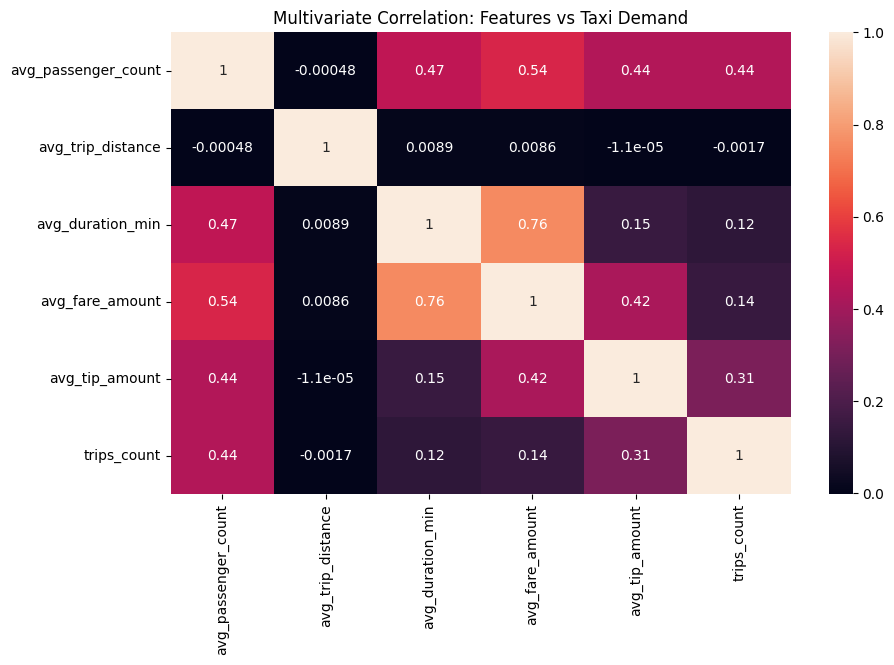

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define target + features
target = 'trips_count'   # change if your column is named differently

features = [
    'avg_passenger_count',
    'avg_trip_distance',
    'avg_duration_min',
    'avg_fare_amount',
    'avg_tip_amount'
]

data_for_corr = trips_per_bin_full[features + [target]]

# Compute correlation matrix
corr_matrix = data_for_corr.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title("Multivariate Correlation: Features vs Taxi Demand")
plt.show()




In [ ]:
corr_with_target = corr_matrix[target].sort_values(ascending=False)
print(corr_with_target)

trips_count            1.000000
avg_passenger_count    0.439795
avg_tip_amount         0.314231
avg_fare_amount        0.143804
avg_duration_min       0.121007
avg_trip_distance     -0.001748
Name: trips_count, dtype: float64


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = trips_per_bin_full[features]

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

               Feature       VIF
0  avg_passenger_count  2.283017
1    avg_trip_distance  1.000237
2     avg_duration_min  4.064258
3      avg_fare_amount  4.810611
4       avg_tip_amount  1.643435


<Figure size 1000x500 with 0 Axes>

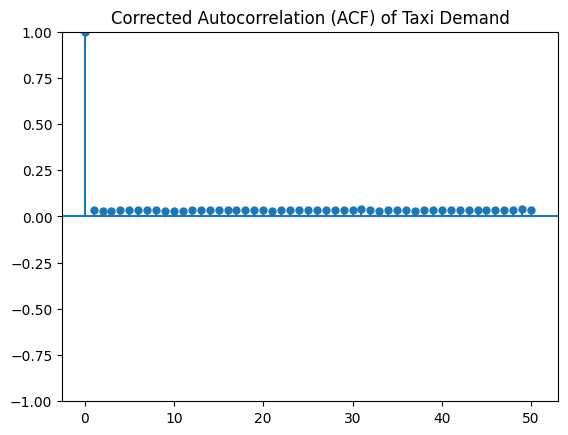

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Convert to datetime if needed
trips_per_bin_full['pickup_bin'] = pd.to_datetime(trips_per_bin_full['pickup_bin'])

# Sort properly
trips_per_bin_full = trips_per_bin_full.sort_values('pickup_bin')

# Now recompute ACF
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

series = trips_per_bin_full['trips_count']

plt.figure(figsize=(10,5))
plot_acf(series, lags=50)
plt.title("Corrected Autocorrelation (ACF) of Taxi Demand")
plt.show()

#Standardization (z-score)

In [ ]:
# All numeric columns
numeric_cols = trips_per_bin_full.select_dtypes(include=['number']).columns.tolist()

# Columns NOT to scale
do_not_scale = [
    'avg_trip_distance', 'PULocationID', 'PU_Borough', 'PU_Zone', 'PU_service_zone',
    'day_of_month', 'month', 'week_of_year', 'weekday', 'hour', 'HalfHourOfDay'
] + [col for col in trips_per_bin_full.columns if col.startswith('is_')] \
  + [col for col in trips_per_bin_full.columns if col.endswith('_Week')] \
  + ['sin_halfhour', 'cos_halfhour']

features_to_scale = [c for c in numeric_cols if c not in do_not_scale]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
trips_per_bin_full[features_to_scale] = scaler.fit_transform(
    trips_per_bin_full[features_to_scale]
)

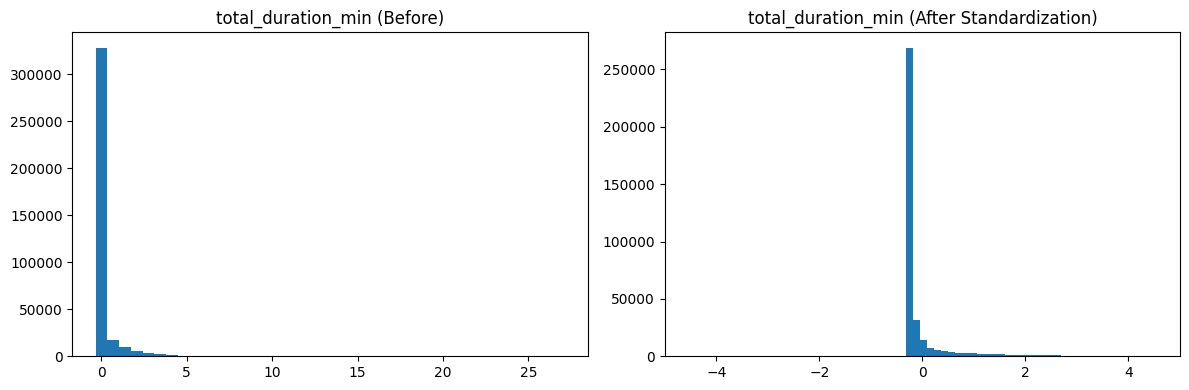

In [ ]:
import matplotlib.pyplot as plt

feature = "total_duration_min"

scaler = StandardScaler()
scaled_values = scaler.fit_transform(trips_per_bin_full[[feature]]).ravel()

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Before scaling
ax[0].hist(trips_per_bin_full[feature], bins=40)
ax[0].set_title(f"{feature} (Before)")

# After scaling
ax[1].hist(scaled_values, bins=200)
ax[1].set_xlim(-5, 5)
ax[1].set_title(f"{feature} (After Standardization)")


plt.tight_layout()
plt.show()